In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_validate

<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [2]:
df = pd.read_excel('neurocontroller_model.xlsx', dtype=np.float32)

In [3]:
df.head(5)

,mass_flow(kg/h),Energy_ref,Torque_ref,screw_speed(rpm),solid_content(%),Energy(kJ/kg),Torque(N.m),∆𝒏,∆𝑐_𝑚
0,2.28,6552.149414,2.972,800.0,70.0,6552.149414,2.972000,0.0,0.0
1,2.28,6552.149414,2.972,1000.0,70.0,9031.174805,3.277172,-200.0,0.0
2,2.28,6552.149414,2.972,1200.0,70.0,8612.666016,2.604422,-400.0,0.0
3,2.28,6552.149414,2.972,800.0,72.5,7118.958984,3.229100,0.0,-2.5
4,2.28,6552.149414,2.972,1000.0,72.5,9297.460938,3.373800,-200.0,-2.5


In [4]:
#define inputs and outputs
df = df.sample(frac=1)
X1_data = df[['mass_flow(kg/h)','Energy_ref','Torque_ref','Energy(kJ/kg)','Torque(N.m)']]
Y1_data = df[['∆𝑐_𝑚']]                    

X_data = X1_data.values
Y_data= Y1_data.values
# normalize data
scaler = MinMaxScaler()
X_data = scaler.fit_transform(X_data)
    

# SKLearnModel

In [5]:
model_cm_Neurocontroller= GradientBoostingRegressor(n_estimators =2000 , learning_rate = 0.3,max_depth=2)
cm_Neurocontroller = cross_validate(model_cm_Neurocontroller,X_data,Y_data.reshape(-1,),cv=10,scoring=('neg_mean_absolute_error'),return_train_score=True)

In [6]:
cm_Neurocontroller

{'fit_time': array([4.63307023, 4.10899353, 2.75299811, 2.7889998 , 2.86501312,
        2.9049983 , 3.21095943, 2.868999  , 2.73201036, 2.6029973 ]),
 'score_time': array([0.006984  , 0.0039897 , 0.00497651, 0.00600243, 0.00499105,
        0.00695276, 0.00500989, 0.00499988, 0.00399518, 0.0050199 ]),
 'test_score': array([-0.08726459, -0.1205748 , -0.16025175, -0.15633539, -0.06770026,
        -0.12837506, -0.1261323 , -0.08063953, -0.07831108, -0.05960701]),
 'train_score': array([-0.05025517, -0.05327315, -0.0640558 , -0.04021318, -0.03610269,
        -0.06745048, -0.0590964 , -0.0393684 , -0.04324221, -0.04253021])}

In [7]:
print("test scores:\n",list(map(abs,cm_Neurocontroller["test_score"])))
print("mean:  ",abs(np.mean(cm_Neurocontroller["test_score"])) )
print("\n\n")
print("train scores:\n",list(map(abs,cm_Neurocontroller["train_score"])))
print("mean:  ",abs(np.mean(cm_Neurocontroller["train_score"]) ))


test scores:
 [0.08726459134811336, 0.12057479914422614, 0.16025175000804703, 0.15633539458933082, 0.06770026056660035, 0.1283750624988663, 0.1261323043611034, 0.08063952502020956, 0.07831108135072429, 0.059607009902802696]
mean:   0.1065191778790024



train scores:
 [0.050255168051219996, 0.053273146853029626, 0.06405579697661222, 0.04021317956787743, 0.036102693416062814, 0.06745048270265738, 0.05909639693497442, 0.03936840041160741, 0.04324221152827845, 0.042530205952360796]
mean:   0.04955876823946805


In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_data, Y_data, test_size=0.01)
model_cm_Neurocontroller= GradientBoostingRegressor( learning_rate=0.2, max_depth=3, n_estimators=200)
model_cm_Neurocontroller.fit(X_train,y_train)
y_pred=model_cm_Neurocontroller.predict(X_test)

c:\Users\aminr\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [9]:
from joblib import dump, load
dump(model_cm_Neurocontroller,'model_cm_Neurocontroller.h5') 

['model_cm_Neurocontroller.h5']

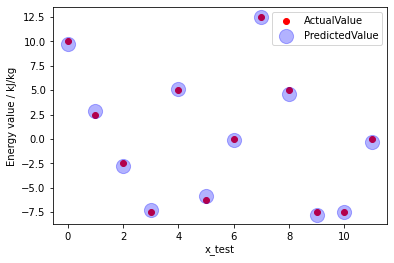

In [10]:
#plots
plt.scatter(list(range(len(y_pred))),y_test, c= ('red'))
plt.scatter(list(range(len(y_pred))),y_pred, c= ('blue'),alpha=0.3,s=200)
plt.xlabel('x_test')
plt.ylabel('Energy value / kJ/kg')
plt.legend(['ActualValue', 'PredictedValue'])
plt.show()